## **1. Required Libraries**

**RDkit:** Provides extensive cheminformatics functionality for working with chemical structures, including fingerprint calculation.  
**Pandas:** Offers robust tools for data manipulation, analysis, and the creation of tabular data structures (DataFrames).  
**ChEMBL web resource client:** Facilitates interaction with the ChEMBL database, allowing you to access and retrieve chemical data programmatically.  
**Scikit-learn:** A versatile machine learning library with a wide range of algorithms for classification, regression, clustering, and more.  
**XGBoost:** Provides a powerful implementation of gradient boosting decision trees, often used for achieving state-of-the-art results on structured data.  
**TensorFlow:** A platform for large-scale numerical computation and machine learning, particularly well-suited for deep learning.  
**Pycaret:** A low-code, lightweight package for quick building and evaluation of ML models.

### **Import libraries**

In [1]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client

**Target search monoamine oxidase A (MAO-A)**

In [3]:
target = new_client.target
target_query = target.search('monoamine oxidase A')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Rattus norvegicus,Monoamine oxidase,32.0,False,CHEMBL2095196,"[{'accession': 'P19643', 'component_descriptio...",PROTEIN FAMILY,10116.0
1,[],Homo sapiens,Monoamine oxidase,32.0,False,CHEMBL2095205,"[{'accession': 'P21397', 'component_descriptio...",PROTEIN FAMILY,9606.0
2,[],Mus musculus,Monoamine oxidase,32.0,False,CHEMBL2111442,"[{'accession': 'Q8BW75', 'component_descriptio...",PROTEIN FAMILY,10090.0
3,[],Bos taurus,Monoamine oxidase,32.0,False,CHEMBL2111399,"[{'accession': 'P56560', 'component_descriptio...",PROTEIN FAMILY,9913.0
4,[],Homo sapiens,Monoamine oxidase A,31.0,False,CHEMBL1951,"[{'accession': 'P21397', 'component_descriptio...",SINGLE PROTEIN,9606.0
...,...,...,...,...,...,...,...,...,...
7459,[],Homo sapiens,CDK15/Cyclin Y,0.0,False,CHEMBL5483184,"[{'accession': 'Q96Q40', 'component_descriptio...",PROTEIN COMPLEX,9606.0
7460,[],Homo sapiens,CDK5/Cyclin D3,0.0,False,CHEMBL5483185,"[{'accession': 'Q00535', 'component_descriptio...",PROTEIN COMPLEX,9606.0
7461,[],Homo sapiens,CDK11A/Cyclin L2,0.0,False,CHEMBL5483187,"[{'accession': 'Q9UQ88', 'component_descriptio...",PROTEIN COMPLEX,9606.0
7462,[],Homo sapiens,CDK11B/Cyclin L2,0.0,False,CHEMBL5483188,"[{'accession': 'P21127', 'component_descriptio...",PROTEIN COMPLEX,9606.0


**Target selection**

In [4]:
selected_target = targets.target_chembl_id[4]
selected_target

'CHEMBL1951'

In [5]:
#Bioactivity data as IC50
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type = "IC50")
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,184068,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,5.47
1,None,None,185442,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,1.36
2,None,None,189322,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,30.8
3,None,None,190494,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,22.5
4,None,None,191747,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5386,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25721949,[],CHEMBL5391072,Inhibition of MAO-A (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,ug ml-1,UO_0000274,None,4.1
5387,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25731050,[],CHEMBL5393270,Inhibition of recombinant MAO-A (unknown origi...,T,None,None,BAO_0000190,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,37.756
5388,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25731051,[],CHEMBL5393270,Inhibition of recombinant MAO-A (unknown origi...,T,None,None,BAO_0000190,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,25.431
5389,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25731052,[],CHEMBL5393270,Inhibition of recombinant MAO-A (unknown origi...,T,None,None,BAO_0000190,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,6.52


In [6]:
# Save the bioactivity data in Pandas dataframe for processing
df = pd.DataFrame(res, columns=['molecule_chembl_id', 'canonical_smiles', 'standard_type', 'standard_relation','standard_value', 'standard_units'])

In [7]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_type,standard_relation,standard_value,standard_units
0,CHEMBL156630,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,IC50,=,5470.0,nM
1,CHEMBL155754,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,IC50,=,1360.0,nM
2,CHEMBL348083,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,IC50,=,30800.0,nM
3,CHEMBL157182,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,IC50,=,22500.0,nM
4,CHEMBL160347,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,IC50,=,180.0,nM


In [8]:
#Inspect standard_relation columns
relation_counts = df['standard_relation'].value_counts()

print(relation_counts)

=     3223
>      977
>=      12
<       10
Name: standard_relation, dtype: int64


In [10]:
#Save raw dataset as CSV
df.to_csv('data/00_mao_a_bioactivity_data_raw.csv', index=False)

### **Data curation and labelling of active and inactive compounds**

In this section data will be preprocessed. We will remove duplicates, empty rows and classify compounds as active or inactive based on their bioactivity (e.g. IC50) values.

In [12]:
df = pd.read_csv("data/00_mao_a_bioactivity_data_raw.csv")
df.shape

(5391, 6)

**Robust Standardization**  
First we will standardize the SMILES for further preprocessing

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize

# Initialize standardizers
normalizer = rdMolStandardize.Normalizer()
fragment_remover = rdMolStandardize.LargestFragmentChooser()
uncharger = rdMolStandardize.Uncharger()
tautomer_enumerator = rdMolStandardize.TautomerEnumerator()

# Robust standardization function (1 SMILES in → 1 SMILES out)
def standardize_smiles(smiles):
    try:
        if not smiles:
            return None
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None

        # Standardization steps
        mol = normalizer.normalize(mol)
        mol = fragment_remover.choose(mol)
        mol = uncharger.uncharge(mol)
        mol = tautomer_enumerator.Canonicalize(mol)  # Canonical tautomer
        Chem.SanitizeMol(mol)

        return Chem.MolToSmiles(mol, canonical=True)
    except Exception as e:
        print(f"Error processing '{smiles}': {e}")
        return None

df['standardized_smiles'] = df['canonical_smiles'].apply(standardize_smiles)

In [14]:
df.shape

(5391, 7)

In [17]:
# Remove empty entries
df2 = df[df.standard_value.notna()]
df2 = df2[df2.standardized_smiles.notna()]
#df2 = df2[df2['standard_relation'].isin(['=', '<'])]
df2 = df2[df2['standard_units'] == 'nM']
df2.shape

(4192, 7)

In [18]:
df2.head()

,molecule_chembl_id,canonical_smiles,standard_type,standard_relation,standard_value,standard_units,standardized_smiles
0,CHEMBL156630,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,IC50,=,5470.0,nM,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21
1,CHEMBL155754,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,IC50,=,1360.0,nM,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21
2,CHEMBL348083,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,IC50,=,30800.0,nM,CC(C)/N=C1/CCc2c1n(C)c1ccccc21
3,CHEMBL157182,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,IC50,=,22500.0,nM,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21
4,CHEMBL160347,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,IC50,=,180.0,nM,COc1cc(Br)c2oc(C3CCNCC3)cc2c1


In [19]:
# Convert 'standard_value' column to numeric format, replacing non-numeric values with NaN
df2['standard_value'] = pd.to_numeric(df2['standard_value'], errors='coerce')

# Drop duplicate compounds based on smiles and keep the first occurrence
df2.drop_duplicates(subset='standardized_smiles', keep='first', inplace=True)

# Calculate the mean of 'standard_value' grouped by 'standardized_smiles'
df2['mean_standard_value'] = df2.groupby('standardized_smiles')['standard_value'].transform('mean')

In [20]:
df2.shape

(3516, 8)

In [21]:
df2.columns

Index(['molecule_chembl_id', 'canonical_smiles', 'standard_type',
       'standard_relation', 'standard_value', 'standard_units',
       'standardized_smiles', 'mean_standard_value'],
      dtype='object')

In [22]:
columns_to_keep = ['molecule_chembl_id', 'standardized_smiles', 'mean_standard_value']
df2 = df2[columns_to_keep]

In [23]:
df2.shape

(3516, 3)

**Inspection of dataset before saving**

In [24]:
# Check for missing values (NaN)
print("Missing values:")
print(df2.isna()) # or df.isnull()

# Count missing values per column
print("\nMissing values count per column:")
print(df2.isna().sum())

# Check for duplicates
print("\nDuplicate rows:")
print(df2.duplicated())

# Check for duplicates in specific columns
print("\nDuplicate rows in 'molecule_chembl_id' and 'standardized_smiles':")
print(df2.duplicated(subset=['molecule_chembl_id', 'standardized_smiles']))

# Count duplicate rows
print("\nNumber of duplicate rows:")
print(df2.duplicated().sum())

Missing values:
      molecule_chembl_id  standardized_smiles  mean_standard_value
0                  False                False                False
1                  False                False                False
2                  False                False                False
3                  False                False                False
4                  False                False                False
...                  ...                  ...                  ...
5384               False                False                False
5385               False                False                False
5387               False                False                False
5388               False                False                False
5390               False                False                False

[3516 rows x 3 columns]

Missing values count per column:
molecule_chembl_id     0
standardized_smiles    0
mean_standard_value    0
dtype: int64

Duplicate rows:
0       False
1 

In [25]:
df2.describe()

,mean_standard_value
count,3.516000e+03
mean,5.237720e+04
std,2.187133e+05
min,1.000000e-01
25%,2.407500e+03
50%,1.288500e+04
75%,6.000000e+04
max,8.637000e+06


In [26]:
df2['pIC50'] = 9-np.log10(df2['mean_standard_value'])
df2.head()

,molecule_chembl_id,standardized_smiles,mean_standard_value,pIC50
0,CHEMBL156630,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,5470.0,5.262013
1,CHEMBL155754,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,1360.0,5.866461
2,CHEMBL348083,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,30800.0,4.511449
3,CHEMBL157182,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,22500.0,4.647817
4,CHEMBL160347,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,180.0,6.744727


**Box plot of pIC50 values**

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

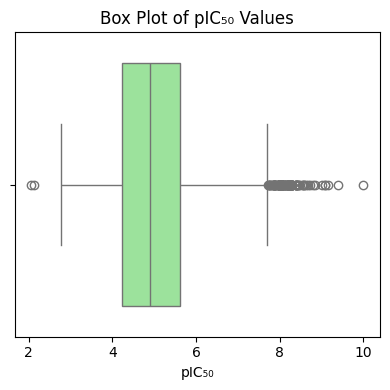

In [30]:
# Plotting the box plot
plt.figure(figsize=(4, 4))
sns.boxplot(x=df2['pIC50'], color='lightgreen')
plt.title('Box Plot of pIC₅₀ Values')
plt.xlabel('pIC₅₀')
plt.tight_layout()
plt.show()

**Remove outliers recursively**

In [31]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df2['pIC50'].quantile(0.25)
Q3 = df2['pIC50'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_clean = df2[(df2['pIC50'] >= lower_bound) & (df2['pIC50'] <= upper_bound)]

# Display the number of removed outliers
num_removed = df2.shape[0] - df_clean.shape[0]
print(f"Removed {num_removed} outliers from the dataset.")

Removed 117 outliers from the dataset.


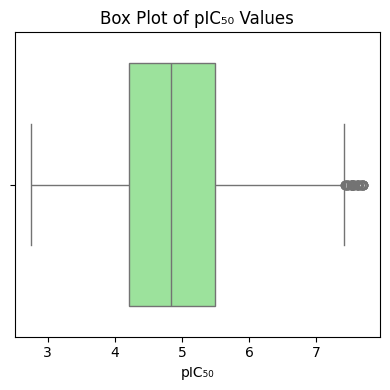

In [32]:
# Plotting the box plot
plt.figure(figsize=(4, 4))
sns.boxplot(x=df_clean['pIC50'], color='lightgreen')
plt.title('Box Plot of pIC₅₀ Values')
plt.xlabel('pIC₅₀')
plt.tight_layout()
plt.show()

Still there are outliers. Let's remove them.

In [33]:
df2 = df_clean.copy()

In [34]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df2['pIC50'].quantile(0.25)
Q3 = df2['pIC50'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_clean = df2[(df2['pIC50'] >= lower_bound) & (df2['pIC50'] <= upper_bound)]

# Display the number of removed outliers
num_removed = df2.shape[0] - df_clean.shape[0]
print(f"Removed {num_removed} outliers from the dataset.")

Removed 41 outliers from the dataset.


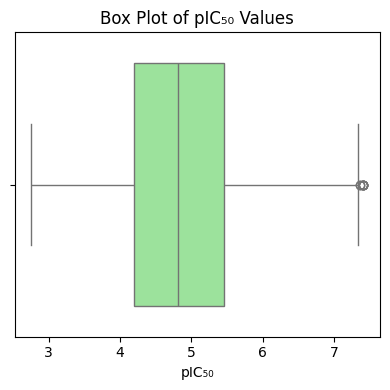

In [35]:
# Plotting the box plot
plt.figure(figsize=(4, 4))
sns.boxplot(x=df_clean['pIC50'], color='lightgreen')
plt.title('Box Plot of pIC₅₀ Values')
plt.xlabel('pIC₅₀')
plt.tight_layout()
plt.show()

Still there are some outliers

In [36]:
df2 = df_clean.copy()

In [37]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df2['pIC50'].quantile(0.25)
Q3 = df2['pIC50'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_clean = df2[(df2['pIC50'] >= lower_bound) & (df2['pIC50'] <= upper_bound)]

# Display the number of removed outliers
num_removed = df2.shape[0] - df_clean.shape[0]
print(f"Removed {num_removed} outliers from the dataset.")

Removed 8 outliers from the dataset.


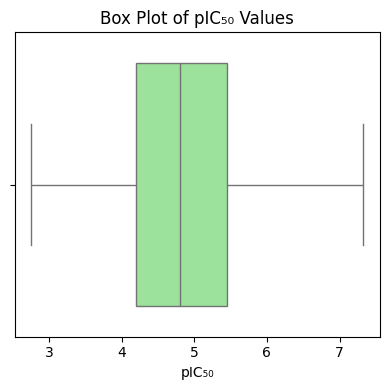

In [38]:
# Plotting the box plot
plt.figure(figsize=(4, 4))
sns.boxplot(x=df_clean['pIC50'], color='lightgreen')
plt.title('Box Plot of pIC₅₀ Values')
plt.xlabel('pIC₅₀')
plt.tight_layout()
plt.show()

Now it looks good and clean. Let's see the pIC50 distributions.

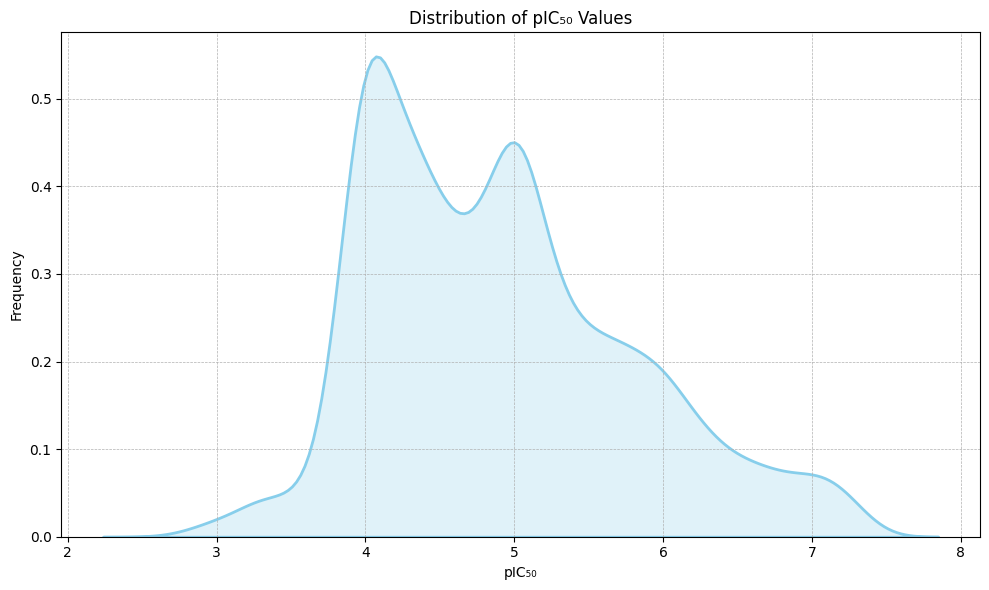

In [39]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
#sns.histplot(df_clean['pIC50'], bins=50, kde=False, color='skyblue', edgecolor='black')
sns.kdeplot(df_clean['pIC50'], fill=True, color='skyblue', linewidth=2)
plt.title('Distribution of pIC₅₀ Values')
plt.xlabel('pIC₅₀')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [40]:
print(df_clean.shape)
df_clean.head()

(3350, 4)


,molecule_chembl_id,standardized_smiles,mean_standard_value,pIC50
0,CHEMBL156630,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,5470.0,5.262013
1,CHEMBL155754,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,1360.0,5.866461
2,CHEMBL348083,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,30800.0,4.511449
3,CHEMBL157182,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,22500.0,4.647817
4,CHEMBL160347,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,180.0,6.744727


### **Classification of molecules based on IC50 data**

In [49]:
active=df_clean.loc[df_clean['pIC50']>5.3]
active.shape

(973, 4)

In [48]:
inactive=df_clean.loc[df_clean['pIC50']<4.3]
inactive.shape

(972, 4)

In [50]:
active = active.copy()
inactive = inactive.copy()

active["Class"] = 1
inactive["Class"] = 0

In [51]:
active.head()

,molecule_chembl_id,standardized_smiles,mean_standard_value,pIC50,Class
1,CHEMBL155754,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,1360.0,5.866461,1
4,CHEMBL160347,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,180.0,6.744727,1
5,CHEMBL347197,CC/N=C1/CCc2c1n(C)c1ccccc21,2120.0,5.673664,1
9,CHEMBL348607,CCCCNC(=O)Oc1ccc2c(c1Br)c1c(n2C)/C(=N\C)CC1,750.0,6.124939,1
10,CHEMBL156919,CCC/N=C1/CCc2c1n(C)c1ccccc21,1610.0,5.793174,1


In [52]:
df3 = pd.concat([active,inactive],axis=0)
df3.head()

,molecule_chembl_id,standardized_smiles,mean_standard_value,pIC50,Class
1,CHEMBL155754,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,1360.0,5.866461,1
4,CHEMBL160347,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,180.0,6.744727,1
5,CHEMBL347197,CC/N=C1/CCc2c1n(C)c1ccccc21,2120.0,5.673664,1
9,CHEMBL348607,CCCCNC(=O)Oc1ccc2c(c1Br)c1c(n2C)/C(=N\C)CC1,750.0,6.124939,1
10,CHEMBL156919,CCC/N=C1/CCc2c1n(C)c1ccccc21,1610.0,5.793174,1


In [53]:
columns_to_keep = ['molecule_chembl_id', 'standardized_smiles', 'pIC50', 'Class']

df3 = df3[columns_to_keep].copy()
df3.head()

,molecule_chembl_id,standardized_smiles,pIC50,Class
1,CHEMBL155754,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,5.866461,1
4,CHEMBL160347,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,6.744727,1
5,CHEMBL347197,CC/N=C1/CCc2c1n(C)c1ccccc21,5.673664,1
9,CHEMBL348607,CCCCNC(=O)Oc1ccc2c(c1Br)c1c(n2C)/C(=N\C)CC1,6.124939,1
10,CHEMBL156919,CCC/N=C1/CCc2c1n(C)c1ccccc21,5.793174,1


In [54]:
df3.shape

(1945, 4)

In [55]:
df3.to_csv("data/01_mao_a_bioactivity_data_labelled.csv", index=False)